In [1253]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import mixture
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.stats.multitest
from enigmatoolbox.datasets import risk_genes
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:

def clusters(df, algo):
    if (algo == 'GMM'):
        title = 'Gaussian Mixture Clustering'
        gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(df[thick])
        labels = gm.predict(df[thick])
        model_df = df.assign(Cluster = labels)
      
    

    elif (algo == 'AC'):
        title = 'Agglomerative Clustering'
        AC = AgglomerativeClustering(n_clusters=n_clusters).fit(df[thick])
        labels = AC.labels_
        model_df = df.assign(Cluster = labels)
        
    elif (algo == 'KM'):
        title = 'K-Means'
        kmeans = KMeans(n_clusters=n_clusters).fit(df[thick])
        labels = kmeans.labels_
        model_df = df.assign(Cluster = labels)

#     model_df.Cluster = model_df.Cluster.replace({0 : 7})    
    sns.set_theme(style="darkgrid",font_scale=1.5)
    sns.set_palette('Set3')
    c = sns.relplot(data=model_df, x="age_at_scan", 
                    y=df[thick].mean(axis = 1), hue=labels, 
                    palette = 'Dark2', s = 100,
                    height=6).set(xlabel = 'Age', ylabel = "Z-score", title = title)
    
#     model_df.Cluster = model_df.Cluster.replace({0 : 7})

    plt.show()
    return model_df

In [3]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

In [4]:
def find_K(Z_df_pred):
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42,
    }
    # A list holds the SSE values for each k
    sse = []
    for k in range(2, 9):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(Z_df_pred)
        sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 9), sse)
    plt.xticks(range(2, 9))
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.title('Sum Squared Error function of number of k')
    plt.show()

In [5]:
data_dir = '/Users/ltran/Documents/Data/'

### Import Z-Scores

TCA

In [27]:
Ztca = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_tca.csv'))

In [28]:
# Define Relatives as TD

Ztca.loc[Ztca.ASD == 'Relative', 'ASD'] = 'No'

In [213]:
# Define Pwr and Acute as AN (optional)

Ztca.loc[Ztca.ASD == 'TCA_pr', 'ASD'] = 'TCA'
Ztca.loc[Ztca.ASD == 'TCA_ac', 'ASD'] = 'TCA'

In [372]:
Ztca.groupby('ASD').size()

ASD
No        45
TCA_ac    40
TCA_pr    47
dtype: int64

ASD 

In [6]:
Zasd = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_asd.csv'))

In [7]:
Zasd = Zasd[Zasd.ASD == 'Yes']

## Import residuals

In [115]:
Zasd = pd.read_csv(os.path.join(data_dir, 'Outputs/resid_asd.csv'))
Zasd = Zasd[Zasd.ASD == 'Yes']

## Import raw data

In [77]:
df_all = pd.read_csv(os.path.join(data_dir, 'Outputs/df_tsa_tca.csv'))

In [78]:
df_all.groupby('ASD').size()

ASD
No             86
Pas_ASD         8
Relative       30
TCA             4
TCA_ac         40
TCA_pr         49
TD_Patient      1
Yes           289
dtype: int64

### Define ROIs

In [79]:
# Extract Z-Scores columns
thick = [col for col in Ztca.columns if 'Z_predict' in col]


In [80]:
len(thick)

16

## Clustering

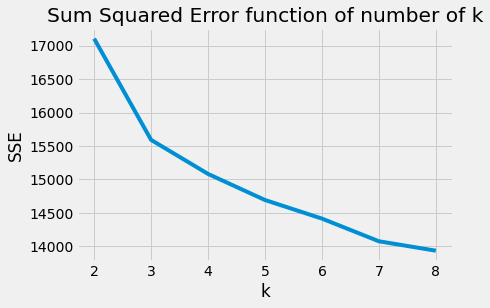

In [10]:
# Find optimal number of clusters
find_K(Zasd[thick])

In [11]:
n_clusters = 3

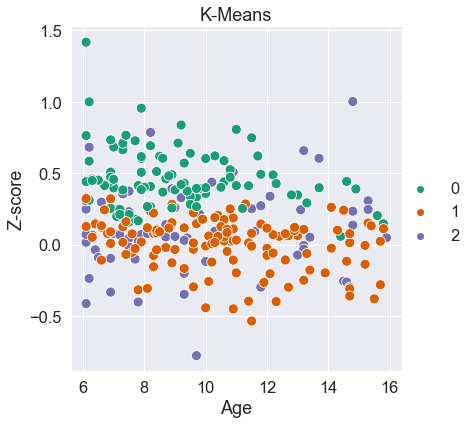

In [131]:
# Compute clusters
GMM_df = clusters(Zasd, algo = 'KM')

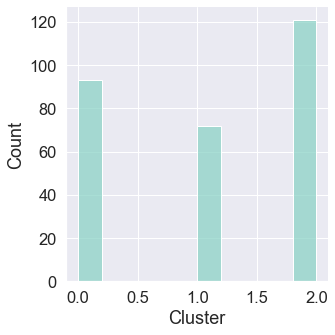

In [14]:
# Clusters sizes

sns.displot(x = GMM_df.Cluster)
plt.show()

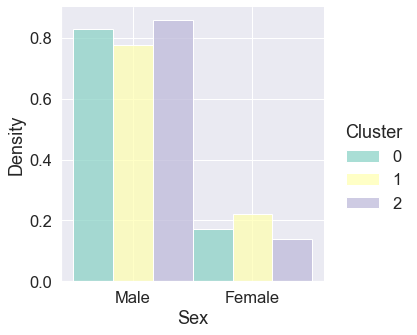

In [15]:
# Clusters sex ratios

sns.displot(x = 'Sex', hue = 'Cluster', data=GMM_df, multiple = 'dodge', palette = 'Set3',
           stat = 'density', common_norm =False)

In [178]:
# Define IQ scores
IQ_sc =  ['IMT',
 'IQ_max',
 'IRF',
 'IVS',
 'IVT']

In [179]:
# Define Autism scores

sc = [    'ADI_R_NONVERBAL_TOTAL_BV', 'ADI_R_ONSET_TOTAL_D', 'ADI_R_RRB_TOTAL_C',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_TOT_B', 'ADOS_TOTC', 'ADOS_TOTCOM',
       'ADOS_TOTComSoc', 'ADOS_TOTD', 'ADOS_TOTE', 'ADOS_TOTSoc']

In [ ]:
sns.set_style('darkgrid')

# IQ scores across clusters


for i in sc:
    sns.boxplot(x = 'Cluster', y = i, data = GMM_df, palette = 'Dark2')
    plt.title(i)
    plt.ylim(-2, 25)
    plt.show()

In [ ]:
# Autism Score distribution across clusters

for i in sc:
    sns.boxplot(x = 'Cluster', y = i, data = GMM_df, palette = 'Dark2')
    plt.title(i)
    plt.ylim(-2, 25)
    plt.show()

## Compare clusters 

Compare mean Z-Scores between AN and Autism subtypes

In [132]:
corr = {}
pvall = {}
for i in range(n_clusters):
    corr.update({f'Cluster{i}':stats.pearsonr(Ztca[thick].mean(), GMM_df.loc[GMM_df.Cluster == i, thick].mean())[0]})
    pvall.update({f'Cluster{i}':stats.pearsonr(Ztca[thick].mean(), GMM_df.loc[GMM_df.Cluster == i, thick].mean())[1]})

In [133]:
d['ROI'] = d.index

Pearson : (0.40116729941033413, 0.0006979387106461001)


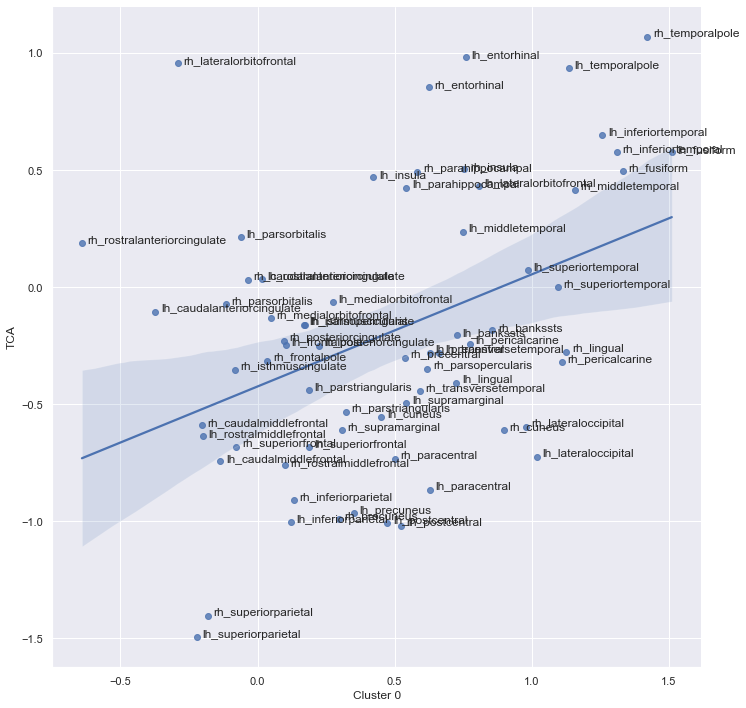

Pearson : (0.8842505764094525, 1.6515087410736917e-23)


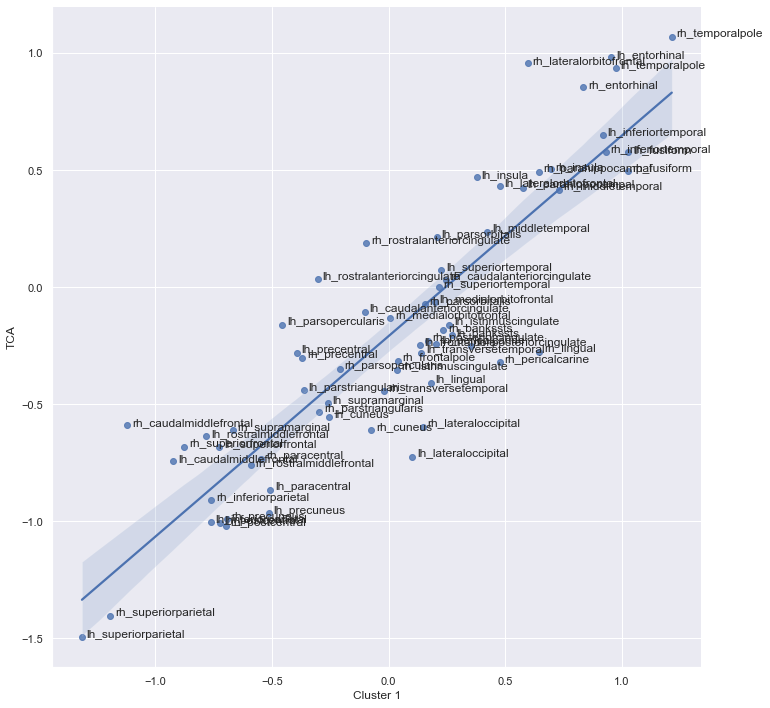

Pearson : (-0.7403504790135428, 5.392206582068767e-13)


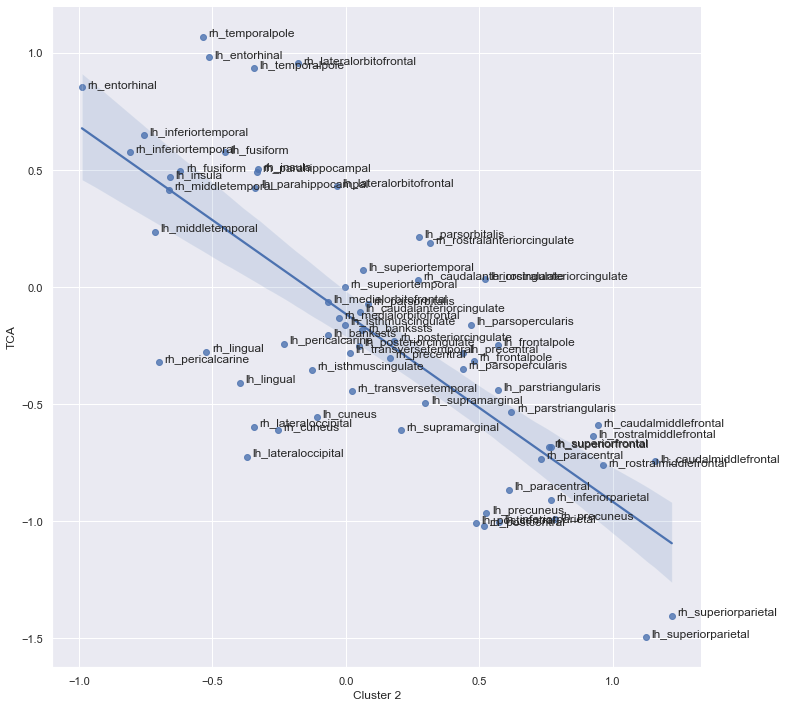

In [134]:

sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in range(n_clusters):
    d = pd.DataFrame.from_dict({'ASD' : GMM_df.loc[GMM_df.Cluster == i, thick].mean(),
                                'TCA' :  Ztca[thick].mean()})
    d['ROI'] = d.index
    sns.lmplot(x = 'ASD', y = 'TCA', data = d, height= 10)
    label_point(d.ASD, d.TCA, d.ROI.str.replace('_thickness_Z_predict', ''), plt.gca())
    print('Pearson :',stats.pearsonr(d['ASD'], d.TCA))
    plt.xlabel(f'Cluster {i}')
    plt.show()

In [148]:
GMM_df.groupby('Cluster').size()

Cluster
0     93
1    121
2     72
dtype: int64

In [176]:
for i in sc:
    temp = GMM_df.dropna(subset=i)
    print(i,'\n', stats.ttest_ind(temp.loc[temp.Cluster == 1, i],  
                    temp.loc[temp.Cluster == 2, i]))

ADI_R_NONVERBAL_TOTAL_BV 
 Ttest_indResult(statistic=3.6029774280868927, pvalue=0.0005381631779356025)
ADI_R_ONSET_TOTAL_D 
 Ttest_indResult(statistic=1.0817748676597039, pvalue=0.28260266717762483)
ADI_R_RRB_TOTAL_C 
 Ttest_indResult(statistic=1.54362530748433, pvalue=0.12643829303596577)
ADI_R_SOCIAL_TOTAL_A 
 Ttest_indResult(statistic=0.5688430179707998, pvalue=0.5709804858430552)
ADI_R_TOT_B 
 Ttest_indResult(statistic=2.992946943677745, pvalue=0.003712119316061209)
ADOS_TOTC 
 Ttest_indResult(statistic=-1.6540205053159505, pvalue=0.10658393195049237)
ADOS_TOTCOM 
 Ttest_indResult(statistic=-1.3862122792871943, pvalue=0.1729977463320976)
ADOS_TOTComSoc 
 Ttest_indResult(statistic=-3.857527240129635, pvalue=0.00023630091110659484)
ADOS_TOTD 
 Ttest_indResult(statistic=1.08207721032693, pvalue=0.28277974212128604)
ADOS_TOTE 
 Ttest_indResult(statistic=0.5630532705768136, pvalue=0.5784139184732386)
ADOS_TOTSoc 
 Ttest_indResult(statistic=-1.499456806508183, pvalue=0.1412350566347149)


In [170]:
for i in range(n_clusters):
    c = GMM_df[GMM_df.Cluster == i]
    print(len(c) - c[sc].isna().sum())

ADI_R_NONVERBAL_TOTAL_BV     9
ADI_R_ONSET_TOTAL_D          6
ADI_R_RRB_TOTAL_C            9
ADI_R_SOCIAL_TOTAL_A         9
ADI_R_TOT_B                  3
ADOS_TOTC                    1
ADOS_TOTCOM                  4
ADOS_TOTComSoc              33
ADOS_TOTD                   29
ADOS_TOTE                    2
ADOS_TOTSoc                  5
dtype: int64
ADI_R_NONVERBAL_TOTAL_BV    24
ADI_R_ONSET_TOTAL_D         21
ADI_R_RRB_TOTAL_C           25
ADI_R_SOCIAL_TOTAL_A        25
ADI_R_TOT_B                 18
ADOS_TOTC                   19
ADOS_TOTCOM                 24
ADOS_TOTComSoc              58
ADOS_TOTD                   54
ADOS_TOTE                   13
ADOS_TOTSoc                 24
dtype: int64
ADI_R_NONVERBAL_TOTAL_BV    60
ADI_R_ONSET_TOTAL_D         61
ADI_R_RRB_TOTAL_C           61
ADI_R_SOCIAL_TOTAL_A        61
ADI_R_TOT_B                 61
ADOS_TOTC                   20
ADOS_TOTCOM                 20
ADOS_TOTComSoc              21
ADOS_TOTD                   21
ADOS_TOTE    